## Assignment 3
### CS22B1082
### Nimisha

#### Download the PISA image's leaning tower and find the inclination angle using appropriate rotations with bilinear interpolation.

#### Note:
- The rotation must be performed using both user-defined and predefined functions.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load the image

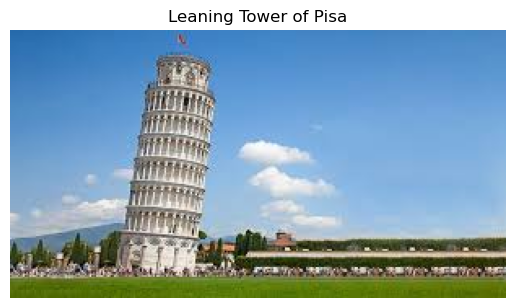

In [2]:
image = cv2.imread('images/pisa.jpeg')
if image is None:
    raise FileNotFoundError("File not found.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Leaning Tower of Pisa")
plt.axis("off")
plt.show()
image_cp = image.copy()

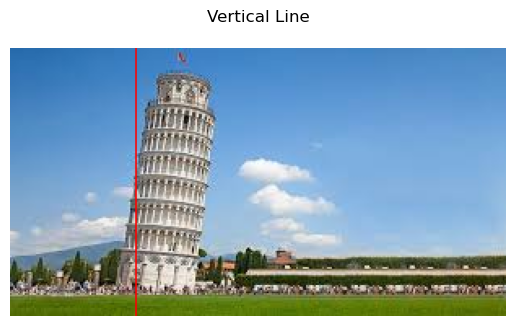

In [3]:
x_coordinate = 77 # for inbulit, 

color = (255, 0, 0)  # Green color for the line
thickness = 1

start_point = (x_coordinate, 0)               
end_point = (x_coordinate, image.shape[0])  
cv2.line(image, start_point, end_point, color, thickness)

plt.imshow(image)
plt.title("Vertical Line\n")
plt.axis("off")
plt.show()

plt.show()

### Manual rotation

In [4]:
def bilinear_interpolation(image, angle):
    angle_rad = np.deg2rad(angle)
    h, w = image.shape[:2]

    # Calculate center of rotation
    center_x, center_y = w // 2, h // 2

    # Calculate the rotation matrix manually
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])

    # Determine bounds of rotated image
    corners = np.array([
        [-center_x, -center_y],
        [w - center_x, -center_y],
        [w - center_x, h - center_y],
        [-center_x, h - center_y],
    ])
    rotated_corners = np.dot(corners, rotation_matrix.T)
    x_min, y_min = rotated_corners.min(axis=0)
    x_max, y_max = rotated_corners.max(axis=0)

    new_w = int(np.ceil(x_max - x_min))
    new_h = int(np.ceil(y_max - y_min))

    # Create a blank output image
    rotated_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)

    # Perform inverse mapping
    for y in range(new_h):
        for x in range(new_w):
            # Map coordinates to the original image space
            original_coords = np.dot([x + x_min, y + y_min], rotation_matrix.T)
            orig_x, orig_y = original_coords + [center_x, center_y]

            # Check bounds
            if 0 <= orig_x < w - 1 and 0 <= orig_y < h - 1:
                # Perform bilinear interpolation
                x1, y1 = int(orig_x), int(orig_y)
                x2, y2 = x1 + 1, y1 + 1

                dx, dy = orig_x - x1, orig_y - y1

                # Interpolated pixel value
                rotated_image[y, x] = (
                    (1 - dx) * (1 - dy) * image[y1, x1] +
                    dx * (1 - dy) * image[y1, x2] +
                    (1 - dx) * dy * image[y2, x1] +
                    dx * dy * image[y2, x2]
                ).astype(np.uint8)

    return rotated_image


### Inbuilt rotation

In [5]:
def predefined_rotation(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated_image

### Finding the angle

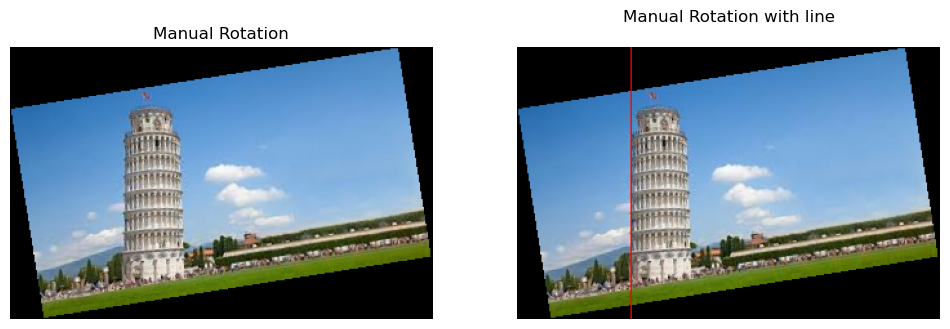

In [6]:
image = image_cp.copy()
angle = 9
rotated_user_defined = bilinear_interpolation(image, angle)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rotated_user_defined)
plt.title("Manual Rotation")
plt.axis("off")

image = rotated_user_defined.copy()
color = (255, 0, 0)  # Green color for the line
thickness = 1

# Define the x-coordinate for the vertical line
x_coordinate = 88 # for manual, 9 degrees

# Draw the vertical line
start_point = (x_coordinate, 0)               # Top of the image
end_point = (x_coordinate, image.shape[0])   # Bottom of the image
cv2.line(image, start_point, end_point, color, thickness)

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("Manual Rotation with line\n")
plt.axis("off")
plt.show()

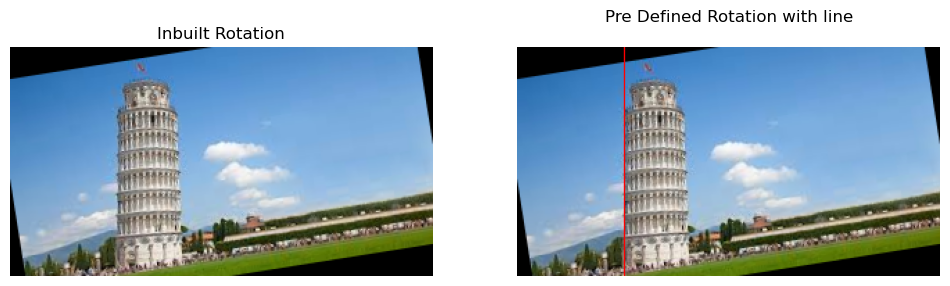

In [11]:
image = image_cp.copy()
angle = 9
rotated_user_defined = bilinear_interpolation(image, angle)
rotated_predefined = predefined_rotation(image, angle)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rotated_predefined)
plt.title("Inbuilt Rotation")
plt.axis("off")

image = rotated_predefined.copy()
color = (255, 0, 0)  # Green color for the line
thickness = 1

# Define the x-coordinate for the vertical line
x_coordinate = 77 # for inbulit, 


# Draw the vertical line
start_point = (x_coordinate, 0)               
end_point = (x_coordinate, image.shape[0])  
cv2.line(image, start_point, end_point, color, thickness)

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("Pre Defined Rotation with line\n")
plt.axis("off")
plt.show()

plt.show()

In [12]:
# Load the image
image = cv2.imread('images/pisa.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
# Apply CLAHE to enhance contrast
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

In [14]:
# Convert to binary for better edge detection
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

In [15]:
# Edge detection
edges = cv2.Canny(binary, 30, 100)

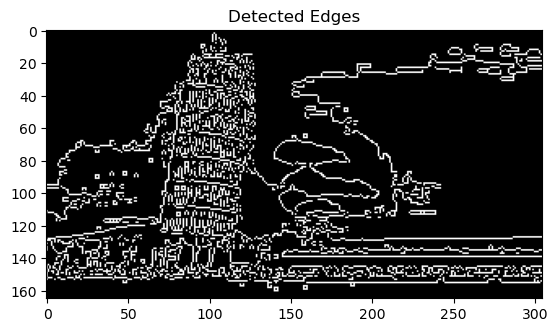

In [16]:
# Display edges for debugging
plt.imshow(edges, cmap='gray')
plt.title("Detected Edges")
plt.show()


In [17]:
# Hough Line Transform to detect tower's inclination
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)
angles = []
if lines is not None and len(lines) > 0:
    for x1, y1, x2, y2 in lines[:, 0]:
        angle = np.rad2deg(np.arctan2(y2 - y1, x2 - x1))
        angles.append(angle)
    inclination_angle = np.mean(angles)
else:
    inclination_angle = 0  # Default to zero if no lines are detected
    print("No lines detected, setting inclination to 0 degrees.")

print(f"Detected inclination angle: {inclination_angle:.2f} degrees")

Detected inclination angle: -4.34 degrees


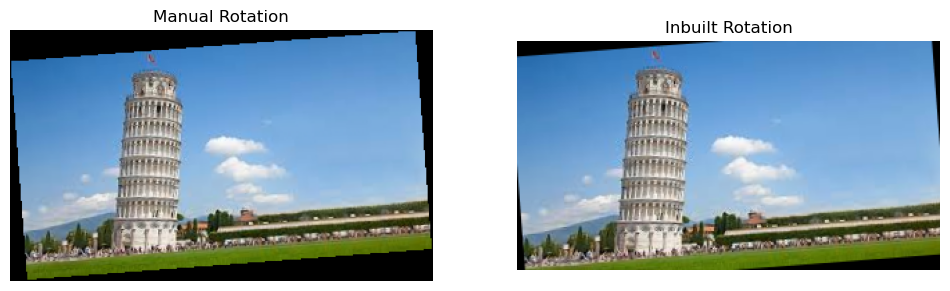

In [19]:
image = image_cp.copy()
angle = -inclination_angle
rotated_user_defined = bilinear_interpolation(image, angle)
rotated_predefined = predefined_rotation(image, angle)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(rotated_user_defined)
plt.title("Manual Rotation")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rotated_predefined)
plt.title("Inbuilt Rotation")
plt.axis("off")
plt.show()